# Title: Analyzing movie ratings according to their Genres

**Information about the data used:**  
    -Data Source: IMDB Movie Dataset  
    -Location: https://grouplens.org/datasets/movielens/  
    -Filename: ml-20m.zip  

# Initial exploration of the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing data

In [2]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.shape

(27278, 3)

In [4]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [5]:
movies.describe()

,movieId
count,27278.000000
mean,59855.480570
std,44429.314697
min,1.000000
25%,6931.250000
50%,68068.000000
75%,100293.250000
max,131262.000000


### Know we will clean our data but let us first check if there is any null value 

In [6]:
movies.isnull().values.any()

False

**As the result show we don't have any NAN value in movies data frame so it is already cleaned and we don't have to execute dropna() method in this case**

Now we will see the list of diffrents genres of movies

In [7]:
genres = list({gen.split('|')[0] for gen in movies.genres})
genres.remove('(no genres listed)')
print(genres)

['IMAX', 'Romance', 'Children', 'Documentary', 'Drama', 'Crime', 'War', 'Sci-Fi', 'Action', 'Comedy', 'Horror', 'Thriller', 'Film-Noir', 'Fantasy', 'Musical', 'Adventure', 'Mystery', 'Animation', 'Western']


In [8]:
movies_new_columns= ["movieId","title","genres"]
movies_new_columns = np.append( movies_new_columns ,list(genres))         
movies_new_columns

array(['movieId', 'title', 'genres', 'IMAX', 'Romance', 'Children',
       'Documentary', 'Drama', 'Crime', 'War', 'Sci-Fi', 'Action',
       'Comedy', 'Horror', 'Thriller', 'Film-Noir', 'Fantasy', 'Musical',
       'Adventure', 'Mystery', 'Animation', 'Western'], dtype='<U11')

**We will add every genres type as a columns with a value True if the genre is related to the film the and false in the other case**

In [9]:
movies_genr_expaned = pd.DataFrame(movies, columns=movies_new_columns)
movies_genr_expaned = movies_genr_expaned.fillna(False)
for genr in genres:
    movies_genr_expaned[genr] = movies_genr_expaned['genres'].str.contains(genr)

The distribution of movie rating by genres 

In [10]:
movies_genr_expaned[genres].sum().sort_values()/movies_genr_expaned[genres].sum().sum()*100

IMAX            0.361891
Film-Noir       0.609306
Western         1.248154
Animation       1.896233
Musical         1.912851
Children        2.103028
War             2.204579
Fantasy         2.607090
Mystery         2.795421
Sci-Fi          3.218242
Adventure       4.300222
Documentary     4.562408
Horror          4.820901
Crime           5.426514
Action          6.499261
Romance         7.620015
Thriller        7.714180
Comedy         15.461595
Drama          24.638109
dtype: float64

_Know we will handle ratings_

In [11]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [12]:
ratings.shape

(20000263, 4)

In [13]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [14]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


In [15]:
ratings.isnull().values.any()

False

*As the result show we don't have any NAN value in ratings data frame so it is already cleaned and we don't have to execute dropna() method in this case too**

**know we will define our research questions:**   _Do **Documentary** movies tend to be rated more highly than other movie genres ?_

_Joining the 2 dataframes_

In [16]:
joined_data = pd.merge(ratings, movies_genr_expaned, how='inner')
joined_data.head()

,userId,movieId,rating,timestamp,title,genres,IMAX,Romance,Children,Documentary,...,Comedy,Horror,Thriller,Film-Noir,Fantasy,Musical,Adventure,Mystery,Animation,Western
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False


**Genres distribution by average ratings:**  the average rating will be affected by the number of movies in every genre.

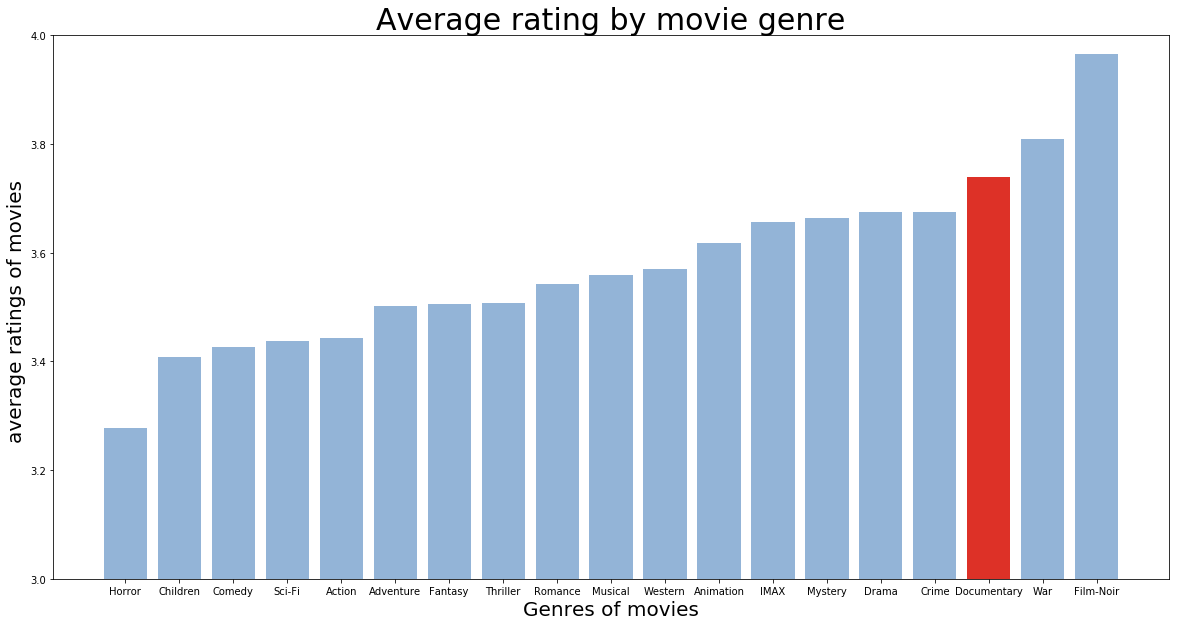

In [22]:
avg_ratings = {genre : joined_data[joined_data[genre]]['rating'].mean() for genre in genres}
avg_ratings = pd.Series(avg_ratings)
#sorting avg rating values
avg_ratings=avg_ratings.sort_values()



#building a nice chart bar with 2017 trend colors

plt.bar(avg_ratings.index,avg_ratings.values, color=["#93B4D7","#93B4D7","#93B4D7","#93B4D7","#93B4D7","#93B4D7","#93B4D7","#93B4D7","#93B4D7","#93B4D7","#93B4D7","#93B4D7","#93B4D7","#93B4D7","#93B4D7","#93B4D7","#dd3127","#93B4D7","#93B4D7"])
plt.xlabel("Genres of movies",fontsize=20)
plt.ylabel("average ratings of movies ",fontsize=20)
plt.title( "Average rating by movie genre",fontsize=30)


# we have limited y bar values between 3.0 and 4.0 because all the avereges of genres are between those 2 values
plt.ylim(3.0,4.0)

from pylab import rcParams
rcParams['figure.figsize'] = (20, 10)

plt.show()


